## <center> CNN - Flower Power III </center>

#### Brown Knapweed, Buttercup(Creeping & Meadow), Chamomile, Common Dandelion,  Common Poppy, Cornflower, Cow Parsley, Cuckooflower, Field Mouse-ear, Flatweed, Hare's-foot clover, Health Spotted Orchid, Hoary Alyssum, Lesser Spearwort,  Marsh Lousewort, Marsh marigold, Meadow Thistle, Ox-eye Daisy, Purple Loosestrife, Red Clover, Redstem Filaree, Southern Marsh Orchid, Tansy, Wild Carrot, White Clover, Yellow Loosestrife

In [1]:
import os
import cv2
import numpy as np

x = [] # Feature dataset with images
y = [] # Target dataset with labels


folder_dir = './Flower-Data_CNN'
size = 128 #Crop the image to 128x128
for folder in os.listdir(folder_dir):
    for file in os.listdir(os.path.join(folder_dir, folder)):
        if file.endswith("JPG"):
            y.append(folder)
            img = cv2.imread(os.path.join(folder_dir, folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (size,size))
            x.append(im)
        else:
            continue

In [2]:
# split the dataset into 80% training and 20% test sets:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=10)

In [3]:
# take a look at one of the images:
X_train[0]

array([[[236, 238,  81],
        [238, 238,  79],
        [246, 243, 103],
        ...,
        [ 47,  63,  43],
        [ 40,  51,  35],
        [ 36,  44,  31]],

       [[238, 239,  75],
        [236, 237,  74],
        [241, 242,  95],
        ...,
        [ 41,  54,  34],
        [ 44,  53,  36],
        [ 38,  41,  30]],

       [[236, 235,  68],
        [232, 233,  82],
        [235, 241, 107],
        ...,
        [ 44,  52,  33],
        [ 42,  46,  31],
        [ 33,  35,  25]],

       ...,

       [[229, 226, 167],
        [247, 240, 187],
        [252, 246, 191],
        ...,
        [ 73, 103,  58],
        [ 75, 105,  63],
        [ 78, 109,  68]],

       [[244, 244, 180],
        [249, 250, 192],
        [254, 254, 198],
        ...,
        [ 67,  95,  55],
        [ 67,  98,  57],
        [ 72, 102,  64]],

       [[240, 241, 167],
        [252, 251, 187],
        [254, 254, 192],
        ...,
        [ 55,  82,  45],
        [ 59,  85,  50],
        [ 66,  94,  56]]

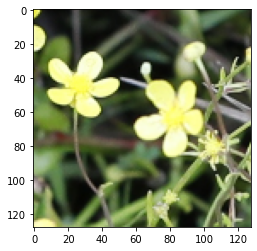

In [4]:
# Show the image
import matplotlib.pyplot as plt
img = plt.imshow(X_train[0])

In [5]:
# Print the label of the image above:
y_train[0]

'Lesser Spearwort'

In [6]:
# Convert all the labels in numerical values
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

In [7]:
y_train

array([13,  9,  1, ..., 22,  8,  7], dtype=int64)

In [8]:
import tensorflow as tf
y_train_one_hot = tf.one_hot(y_train, depth=26)
y_test_one_hot = tf.one_hot(y_test, depth=26)
y_train_one_hot

<tf.Tensor: shape=(3336, 26), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [9]:
# Normalize the pixels in the images to be values between 0 and 1
X_train = np.array(X_train)/255
X_test= np.array(X_test)/255
X_train

array([[[[0.9254902 , 0.93333333, 0.31764706],
         [0.93333333, 0.93333333, 0.30980392],
         [0.96470588, 0.95294118, 0.40392157],
         ...,
         [0.18431373, 0.24705882, 0.16862745],
         [0.15686275, 0.2       , 0.1372549 ],
         [0.14117647, 0.17254902, 0.12156863]],

        [[0.93333333, 0.9372549 , 0.29411765],
         [0.9254902 , 0.92941176, 0.29019608],
         [0.94509804, 0.94901961, 0.37254902],
         ...,
         [0.16078431, 0.21176471, 0.13333333],
         [0.17254902, 0.20784314, 0.14117647],
         [0.14901961, 0.16078431, 0.11764706]],

        [[0.9254902 , 0.92156863, 0.26666667],
         [0.90980392, 0.91372549, 0.32156863],
         [0.92156863, 0.94509804, 0.41960784],
         ...,
         [0.17254902, 0.20392157, 0.12941176],
         [0.16470588, 0.18039216, 0.12156863],
         [0.12941176, 0.1372549 , 0.09803922]],

        ...,

        [[0.89803922, 0.88627451, 0.65490196],
         [0.96862745, 0.94117647, 0.73333333]

## Create and build the model

In [10]:
#Tensorflow Keras CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
# simple early stopping
# es = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [12]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (size,size,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
#model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(26, activation = "softmax"))

In [13]:
# Adding a learning rate
opt = tf.keras.optimizers.Adam(learning_rate = 0.0001)

In [14]:
# compile 
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])
batch_size= 32 #64
epochs= 100 #maybe epochs 128
history = model.fit(X_train,y_train_one_hot, batch_size=batch_size,
                              epochs = epochs,
                              validation_split=0.3,
                              verbose = 1)
                            #  callbacks = [es])

Epoch 1/100
73/73 [==============================] - 133s 2s/step - loss: 3.2176 - accuracy: 0.0612 - val_loss: 3.1345 - val_accuracy: 0.1149
Epoch 2/100
73/73 [==============================] - 132s 2s/step - loss: 3.0415 - accuracy: 0.1186 - val_loss: 2.8188 - val_accuracy: 0.2078
Epoch 3/100
73/73 [==============================] - 133s 2s/step - loss: 2.8590 - accuracy: 0.1747 - val_loss: 2.6157 - val_accuracy: 0.3247
Epoch 4/100
73/73 [==============================] - 135s 2s/step - loss: 2.6278 - accuracy: 0.2257 - val_loss: 2.3292 - val_accuracy: 0.3926
Epoch 5/100
73/73 [==============================] - 134s 2s/step - loss: 2.4215 - accuracy: 0.2848 - val_loss: 2.0956 - val_accuracy: 0.4396
Epoch 6/100
73/73 [==============================] - 136s 2s/step - loss: 2.2278 - accuracy: 0.3443 - val_loss: 1.8791 - val_accuracy: 0.5255
Epoch 7/100
73/73 [==============================] - 135s 2s/step - loss: 1.9866 - accuracy: 0.4060 - val_loss: 1.6547 - val_accuracy: 0.5165
Epoch 

73/73 [==============================] - 126s 2s/step - loss: 0.3788 - accuracy: 0.8668 - val_loss: 0.9894 - val_accuracy: 0.7572
Epoch 59/100
73/73 [==============================] - 126s 2s/step - loss: 0.3231 - accuracy: 0.8895 - val_loss: 0.8901 - val_accuracy: 0.7922
Epoch 60/100
73/73 [==============================] - 126s 2s/step - loss: 0.2949 - accuracy: 0.8951 - val_loss: 0.9211 - val_accuracy: 0.7972
Epoch 61/100
73/73 [==============================] - 126s 2s/step - loss: 0.3571 - accuracy: 0.8779 - val_loss: 0.9575 - val_accuracy: 0.7852
Epoch 62/100
73/73 [==============================] - 125s 2s/step - loss: 0.3160 - accuracy: 0.8865 - val_loss: 0.9004 - val_accuracy: 0.7972
Epoch 63/100
73/73 [==============================] - 128s 2s/step - loss: 0.3049 - accuracy: 0.8899 - val_loss: 1.3242 - val_accuracy: 0.7512
Epoch 64/100
73/73 [==============================] - 127s 2s/step - loss: 0.3109 - accuracy: 0.8887 - val_loss: 0.9538 - val_accuracy: 0.7802
Epoch 65/100

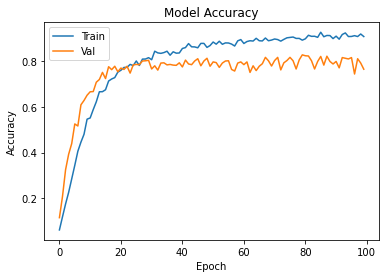

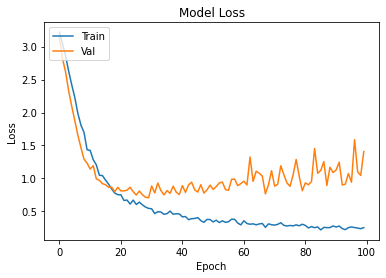

In [15]:
#accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Train','Val'],loc='upper left')
plt.show()

#Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Train','Val'],loc='upper left')
plt.show()

In [16]:
# Prediction
predict_model = model.predict(np.array(X_train))
predict_model = np.argmax(predict_model, axis=1)
predict_model

array([13,  9,  1, ..., 22, 12, 24], dtype=int64)

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true = y_train, y_pred = predict_model)

In [18]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [19]:
cm_plot_labels = ['Brown Knapweed', 'Buttercup', 'Chamomile', 'Common Dandelion', 'Common Poppy', 'Cornflower', 'Cow Parsley',
                             'Cuckooflower', 'Field Mouse-ear', 'Flatweed', 'Hares-foot clover', 'Health Spotted Orchid', 'Hoary Alyssum', 'Lesser Spearwort', 
                             'Marsh Lousewort', 'Marsh marigold', 'Meadow Thistle', 'Ox-eye Daisy', 'Purple Loosestrife', 'Red Clover', 'Redstem Filaree',
                             'Southern Marsh Orchid', 'Tansy', 'White Clover', 'Wild Carrot', 'Yellow Loosestrife']

Confusion matrix, without normalization
[[ 94   0   0   0   0   0   1   0   1   0   0   0   0   0   0   0   2   0
   10   2   0   0   0   0   0   2]
 [  0 220   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0
    0   0   0   0   4   0   0   1]
 [  0   0 118   0   0   0   0   0   0   0   0   1   1   0   0   0   0   1
    0   0   0   0   1   0   1   0]
 [  0   6   0  70   0   0   0   0   0   5   0   0   0   0   0   2   0   0
    0   0   0   0   1   0   0   1]
 [  0   0   1   0  89   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  32   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 186   0   0   0   0   0  17   0   0   0   0   0
    0   0   0   0   0   0   5   0]
 [  0   0   0   0   0   0   7 134   0   0   1   4   1   0   0   0   2   0
    0   0   0   0   0   0  13   0]
 [  0   0   0   0   0   0   5   0  90   0   1   0  16   0   0   0   0   0
    0   0   0 

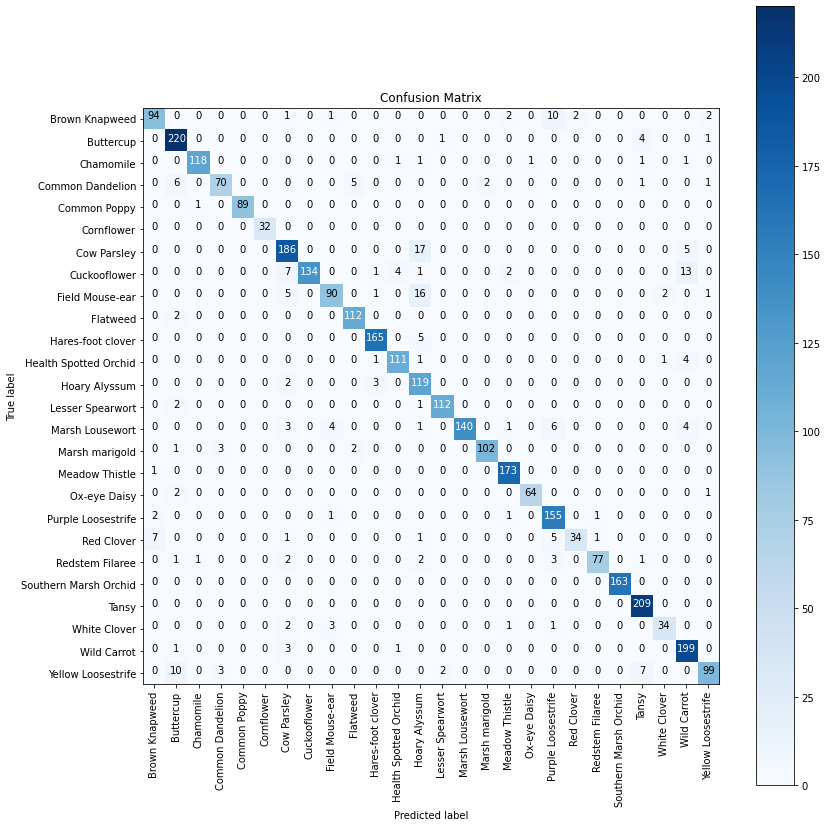

In [20]:
import itertools
fig, ax = plt.subplots(figsize=(12, 12))
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

### Evaluate the model on the dataset

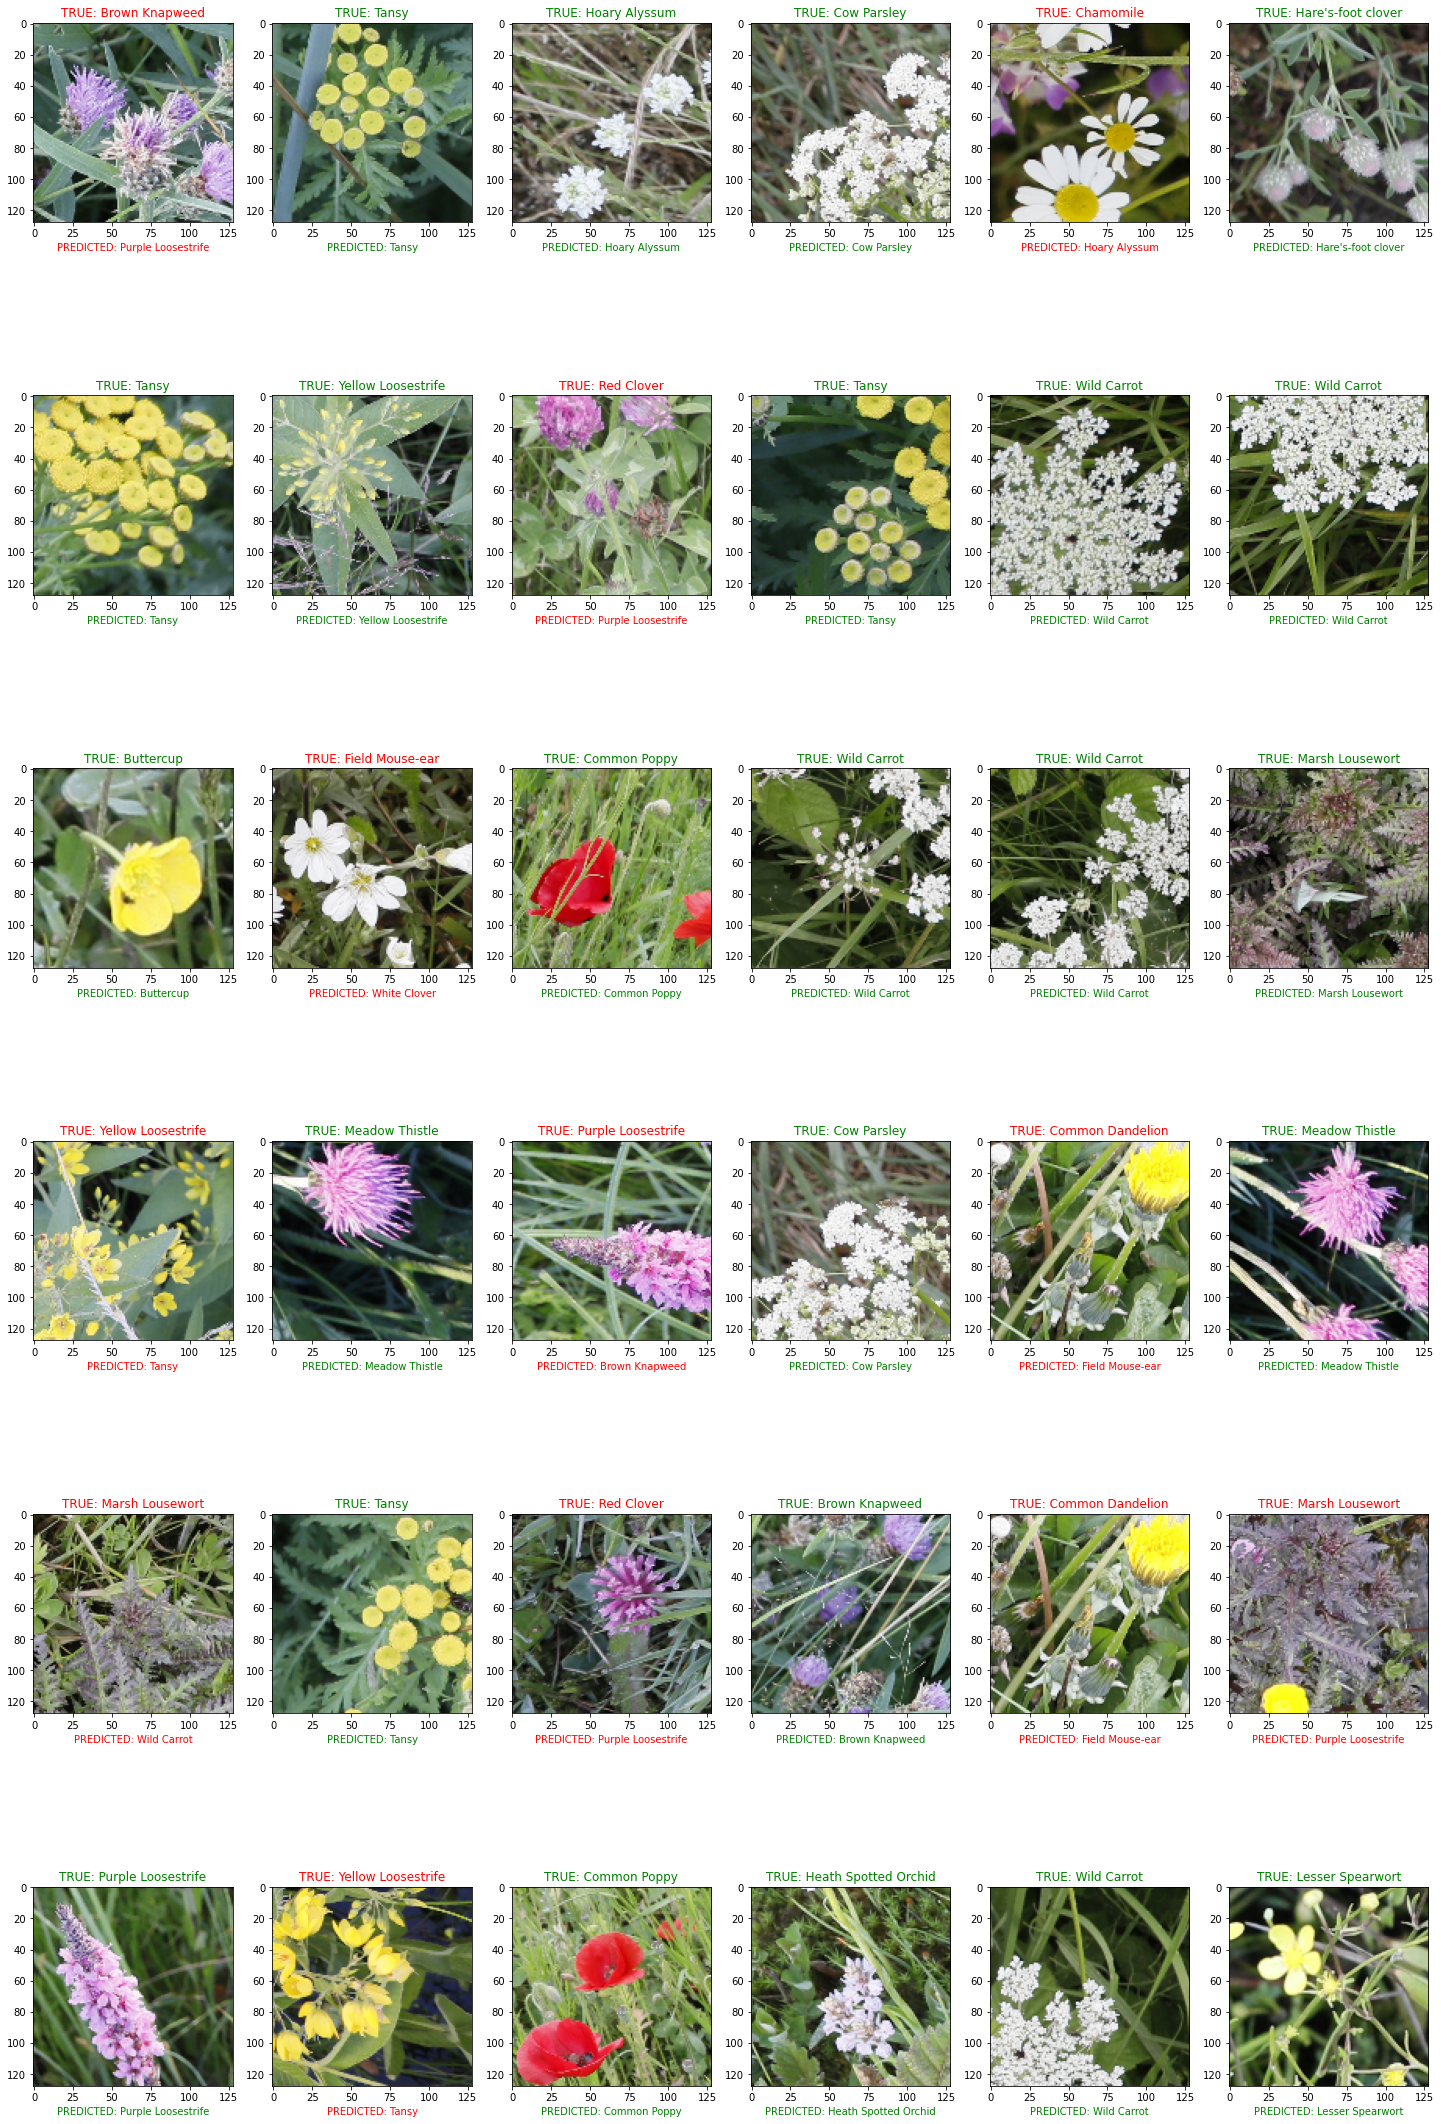

In [21]:
import matplotlib.pyplot as plt
categories = np.sort(os.listdir(folder_dir))
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(y_test_one_hot[k])] == categories[np.argmax(model.predict(X_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test_one_hot[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(size, size, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test_one_hot[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(size, size, 3), cmap='gray')

In [21]:
y_test[1]

13

### Evaluate the model on 2 new images 

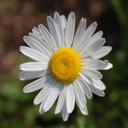

In [92]:
import PIL.Image as Image
SIZE = (128,128)
#insert new Daisy image
new_im = Image.open('Daisy.jpg').resize(SIZE)
new_im

In [93]:
new_im = np.array(new_im)/255
new_im[np.newaxis, ...].shape
result = model.predict(new_im[np.newaxis, ...])
#predict on the new daisy image
predic_label_index = np.argmax(result)
predic_label_index

1

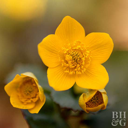

In [94]:
im = Image.open('Marsh.jpg').resize(SIZE)
im

In [95]:
im = np.array(im)/255
im[np.newaxis, ...].shape
result1 = model.predict(im[np.newaxis, ...])
predic_label_index1 = np.argmax(result1)
predic_label_index1

0

Label 0 is for Marsh-marigold and label 1 is for Daisy.